In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://books.toscrape.com/catalogue/page-1.html'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
books = soup.find_all('article', class_='product_pod')
for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text
    rating_class = book.find('p')['class'][1]
    

    print(f" Title: {title}")
    print(f" Price: {price}")
    print(f" Rating: {rating_class}")
    print('----------------------')


 Title: A Light in the Attic
 Price: Â£51.77
 Rating: Three
----------------------
 Title: Tipping the Velvet
 Price: Â£53.74
 Rating: One
----------------------
 Title: Soumission
 Price: Â£50.10
 Rating: One
----------------------
 Title: Sharp Objects
 Price: Â£47.82
 Rating: Four
----------------------
 Title: Sapiens: A Brief History of Humankind
 Price: Â£54.23
 Rating: Five
----------------------
 Title: The Requiem Red
 Price: Â£22.65
 Rating: One
----------------------
 Title: The Dirty Little Secrets of Getting Your Dream Job
 Price: Â£33.34
 Rating: Four
----------------------
 Title: The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull
 Price: Â£17.93
 Rating: Three
----------------------
 Title: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
 Price: Â£22.60
 Rating: Four
----------------------
 Title: The Black Maria
 Price: Â£52.15
 Rating: One
----------------------
 Title: Starving Hearts

In [4]:
import csv

# نجهز الملف
with open('books_data.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Title', 'Price', 'Rating'])  # العناوين

    # نعيد نفس اللوب
    for book in books:
        title = book.h3.a['title']
        price = book.find('p', class_='price_color').text
        rating_class = book.find('p')['class'][1]

        writer.writerow([title, price, rating_class])


In [ ]:
import csv
import re

cleaned_data = []

# نقرأ الملف اللي عملناه قبل كده
with open('books_data.csv', 'r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        title = row['Title']

        #  نشيل رمز العملة باستخدام regex
        price = re.sub(r'[^\d.]', '', row['Price']) # ة
        price = float(price)

        ratings_dict = {
            'One': 1,
            'Two': 2,
            'Three': 3,
            'Four': 4,
            'Five': 5
        }
        rating = ratings_dict.get(row['Rating'], 0)

        cleaned_data.append([title, price, rating])

# نكتب البيانات النضيفة في ملف جديد
with open('books_data_cleaned.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Title', 'Price', 'Rating'])
    writer.writerows(cleaned_data)


In [6]:
import pandas as pd

# نقرأ البيانات الي اتعملها كلين
df = pd.read_csv('books_data_cleaned.csv')

#  حساب الإحصائيات الأساسية
print("Basic Statistics:")
print(df.describe())

#  حساب متوسط السعر
average_price = df['Price'].mean()
print(f"Average Price: {average_price:.2f}")

#  حساب  (Median) للسعر
median_price = df['Price'].median()
print(f"Median Price: {median_price:.2f}")

# (Rating)
rating_distribution = df['Rating'].value_counts()
print(f"Rating Distribution:\n{rating_distribution}")

#  العثور على الكتب الأعلى تقييمًا أو الأعلى سعرًا
max_price_book = df.loc[df['Price'].idxmax()]
max_rating_book = df.loc[df['Rating'].idxmax()]

print(f"\nMost Expensive Book: {max_price_book['Title']} - Price: {max_price_book['Price']}")
print(f"Highest Rated Book: {max_rating_book['Title']} - Rating: {max_rating_book['Rating']}")


Basic Statistics:
           Price     Rating
count  20.000000  20.000000
mean   38.048500   2.850000
std    15.135231   1.565248
min    13.990000   1.000000
25%    22.637500   1.000000
50%    41.380000   3.000000
75%    51.865000   4.000000
max    57.250000   5.000000
Average Price: 38.05
Median Price: 41.38
Rating Distribution:
Rating
1    6
4    4
5    4
3    3
2    3
Name: count, dtype: int64

Most Expensive Book: Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991 - Price: 57.25
Highest Rated Book: Sapiens: A Brief History of Humankind - Rating: 5


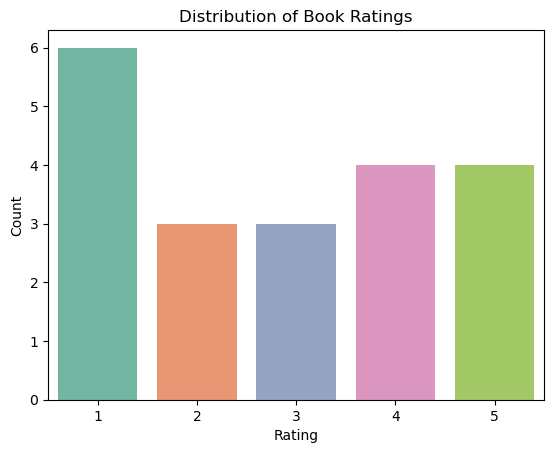

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Rating', data=df, hue='Rating', palette='Set2', legend=False)
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


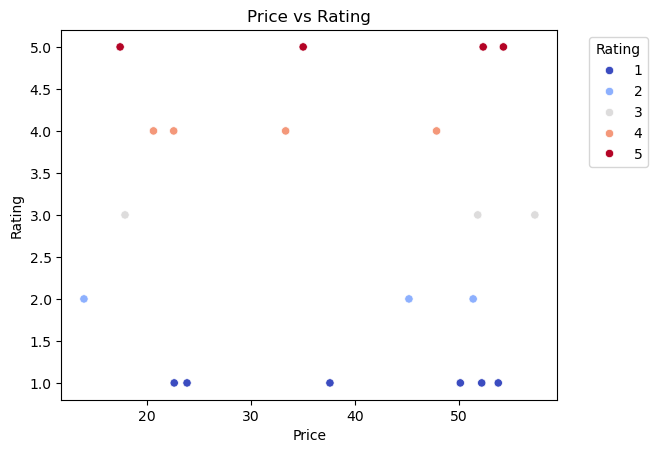

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# رسم العلاقة بين السعر والتقييم ـ plot
sns.scatterplot(data=df, x='Price', y='Rating', hue='Rating', palette='coolwarm')

# تحديد عنوان الرسم والمحاور
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')

plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()


In [9]:
!pip install "pymongo[srv]"


In [10]:
pip install dnspython


Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip show pymongo


In [13]:
from pymongo import MongoClient

In [ ]:

#ا

# الاتصال بـ MongoDB
client = MongoClient(uri)

db = client['mydatabase'] 
collection = db['mycollection']  
document = {"name": "John", "age": 30}
collection.insert_one(document)

# 
for doc in collection.find().limit(5):
    print(doc)

#  kollohhassan  U0fv7c6raqnqN5TO

{'_id': ObjectId('6813fdcfb0babd5385db5a69'), 'name': 'John', 'age': 30}
{'_id': ObjectId('6813fe54b0babd5385db5a6b'), 'Title': 'A Light in the Attic', 'Price': 51.77, 'Rating': 3}
{'_id': ObjectId('6813fe54b0babd5385db5a6c'), 'Title': 'Tipping the Velvet', 'Price': 53.74, 'Rating': 1}
{'_id': ObjectId('6813fe54b0babd5385db5a6d'), 'Title': 'Soumission', 'Price': 50.1, 'Rating': 1}
{'_id': ObjectId('6813fe54b0babd5385db5a6e'), 'Title': 'Sharp Objects', 'Price': 47.82, 'Rating': 4}


In [ ]:
import pandas as pd
from pymongo import MongoClient

# data prossecing
df = pd.read_csv('books_data_cleaned.csv')  # أو أي DataFrame انت عملته
# data frame to dict
data_dict = df.to_dict(orient='records')

# MongoDB Atlas URI
# connect to data base
client = MongoClient(uri)
db = client["mydatabase"]
collection = db["mycollection"]         

# ح
collection.insert_many(data_dict)

# first 5 books 
for book in collection.find().limit(5):
    print(book)


{'_id': ObjectId('6813fdcfb0babd5385db5a69'), 'name': 'John', 'age': 30}
{'_id': ObjectId('6813fe54b0babd5385db5a6b'), 'Title': 'A Light in the Attic', 'Price': 51.77, 'Rating': 3}
{'_id': ObjectId('6813fe54b0babd5385db5a6c'), 'Title': 'Tipping the Velvet', 'Price': 53.74, 'Rating': 1}
{'_id': ObjectId('6813fe54b0babd5385db5a6d'), 'Title': 'Soumission', 'Price': 50.1, 'Rating': 1}
{'_id': ObjectId('6813fe54b0babd5385db5a6e'), 'Title': 'Sharp Objects', 'Price': 47.82, 'Rating': 4}


In [16]:
from pymongo import MongoClient
import pandas as pd

# قراءة ملف البيانات (مثال)
df = pd.read_csv('books_data_cleaned.csv')
data_dict = df.to_dict(orient='records')


# اconnect
client = MongoClient(uri)
db = client["books"]
collection = db["processedBooks"]

collection.insert_many(data_dict)
# first 5 
for book in collection.find().limit(5):
    print(book)


{'_id': ObjectId('67fd69014b9c8857411bc12e'), 'Title': 'A Light in the Attic', 'Price': 51.77, 'Rating': 3}
{'_id': ObjectId('67fd69014b9c8857411bc12f'), 'Title': 'Tipping the Velvet', 'Price': 53.74, 'Rating': 1}
{'_id': ObjectId('67fd69014b9c8857411bc130'), 'Title': 'Soumission', 'Price': 50.1, 'Rating': 1}
{'_id': ObjectId('67fd69014b9c8857411bc131'), 'Title': 'Sharp Objects', 'Price': 47.82, 'Rating': 4}
{'_id': ObjectId('67fd69014b9c8857411bc132'), 'Title': 'Sapiens: A Brief History of Humankind', 'Price': 54.23, 'Rating': 5}
